#### Importing Packages

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("G:/Machine Learning/Drive/Drive-final/Classification/dataset/kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


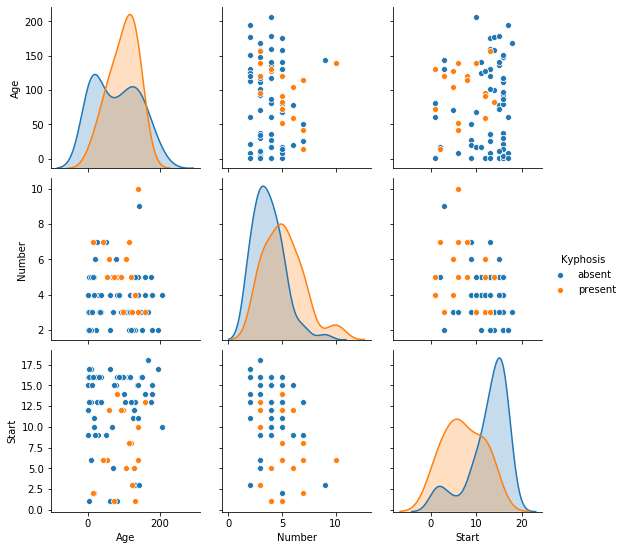

In [9]:
sns.pairplot(df, hue = 'Kyphosis')

## Train Test Slpit

In [13]:
X = df.drop(['Kyphosis'], axis = 1)
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [14]:
y = df['Kyphosis']
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

In [20]:
print('X_train.shape()', X_train.shape )
print('X_test.shape()', X_test.shape )
print('y_train.shape()', y_train.shape )
print('y_test.shape()',y_test.shape )

X_train.shape() (64, 3)
X_test.shape() (17, 3)
y_train.shape() (64,)
y_test.shape() (17,)


### Training using Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
#Training accuracy
y_pred_train = dtree.predict(X_train)

In [30]:
print('accuracy score: ', accuracy_score(y_pred_train, y_train))
print('\nClassification Report:\n ', classification_report(y_pred_train, y_train))
print('COnfusion Matrix: \n', confusion_matrix(y_pred_train, y_train))

accuracy score:  1.0

Classification Report:
                precision    recall  f1-score   support

      absent       1.00      1.00      1.00        50
     present       1.00      1.00      1.00        14

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

COnfusion Matrix: 
 [[50  0]
 [ 0 14]]


In [31]:
#Testing accuracy
y_pred_test = dtree.predict(X_test)

In [32]:
print('accuracy score: ', accuracy_score(y_pred_test, y_test))
print('\nClassification Report:\n ', classification_report(y_pred_test, y_test))
print('COnfusion Matrix: \n', confusion_matrix(y_pred_test, y_test))

accuracy score:  0.7058823529411765

Classification Report:
                precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17

COnfusion Matrix: 
 [[11  2]
 [ 3  1]]


### Visualization of Decision Tree

In [33]:
from sklearn.tree import plot_tree

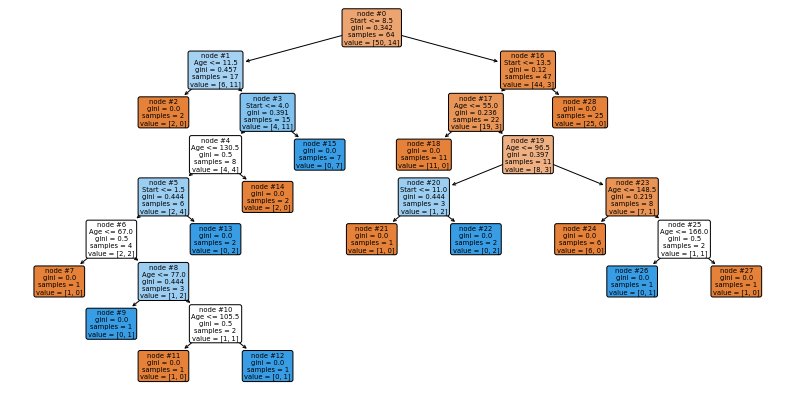

In [39]:
import matplotlib.pyplot as plt

features = list(df.columns[1:])


plt.figure(figsize=(14,7))


s= plot_tree(dtree,
            filled = True,
            rounded=True,
            feature_names = features,
            rotate = True,
            node_ids=True)